<a href="https://colab.research.google.com/github/zcqin/PRML-2025/blob/main/LM1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear Models - 1

**Zengchang Qin**

zengchang.qin@gmail.com

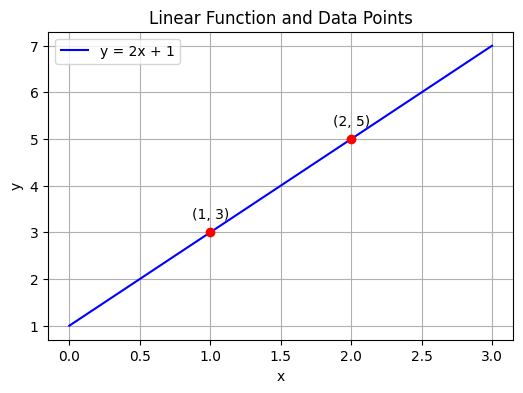

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the linear function
def linear_function(x):
    return 2*x + 1

# Data points
x_values = [1, 2]
y_values = [linear_function(x) for x in x_values]

# Plot the linear function
x_range = np.linspace(0, 3, 100)
y_range = linear_function(x_range)

plt.figure(figsize=(6, 4))
plt.plot(x_range, y_range, label='y = 2x + 1', color='blue')
plt.scatter(x_values, y_values, color='red', zorder=5)

# Annotate the data points
for i, txt in enumerate(y_values):
    plt.annotate(f'({x_values[i]}, {txt})', (x_values[i], txt), textcoords="offset points", xytext=(0,10), ha='center')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Function and Data Points')
plt.legend()
plt.grid(True)
plt.show()


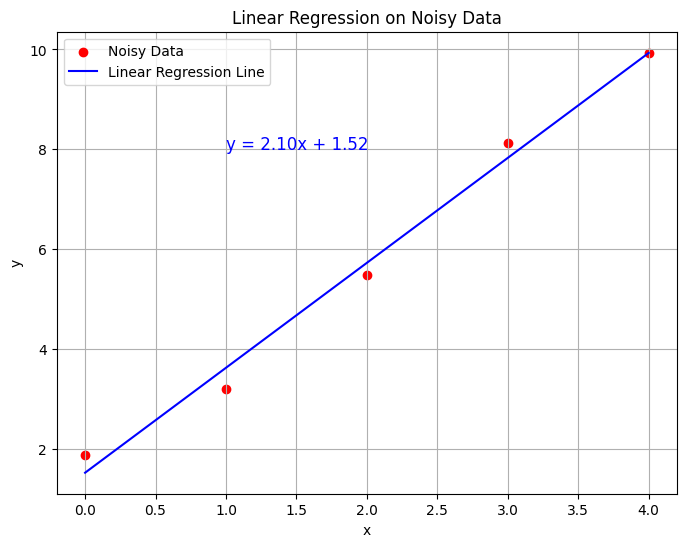

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Define the x_samples and y_noisy values
x_samples = np.array([0, 1, 2, 3, 4])
y_noisy = np.array([1.88202617, 3.2000786, 5.48936899, 8.1204466, 9.933779])

# Reshape x_samples for sklearn's LinearRegression
x_samples_reshaped = x_samples.reshape(-1, 1)

# Initialize and fit the Linear Regression model
model = LinearRegression()
model.fit(x_samples_reshaped, y_noisy)

# Extracting the slope and intercept from the model
slope = model.coef_[0]
intercept = model.intercept_

# Predict y values using the fitted model
y_predicted = model.predict(x_samples_reshaped)

# Plotting the original noisy data
plt.figure(figsize=(8, 6))
plt.scatter(x_samples, y_noisy, color='red', label='Noisy Data')

# Plotting the linear regression line
plt.plot(x_samples, y_predicted, color='blue', label='Linear Regression Line')

# Annotate the linear equation on the plot
plt.text(1, 8, f'y = {slope:.2f}x + {intercept:.2f}', fontsize=12, color='blue')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression on Noisy Data')
plt.legend()
plt.grid(True)
plt.show()



Test of overfitting with polynomials

<ipython-input-2-124b5c42b686>:21: RankWarning: Polyfit may be poorly conditioned
  coefs = np.polyfit(x_data, y_data, degree)


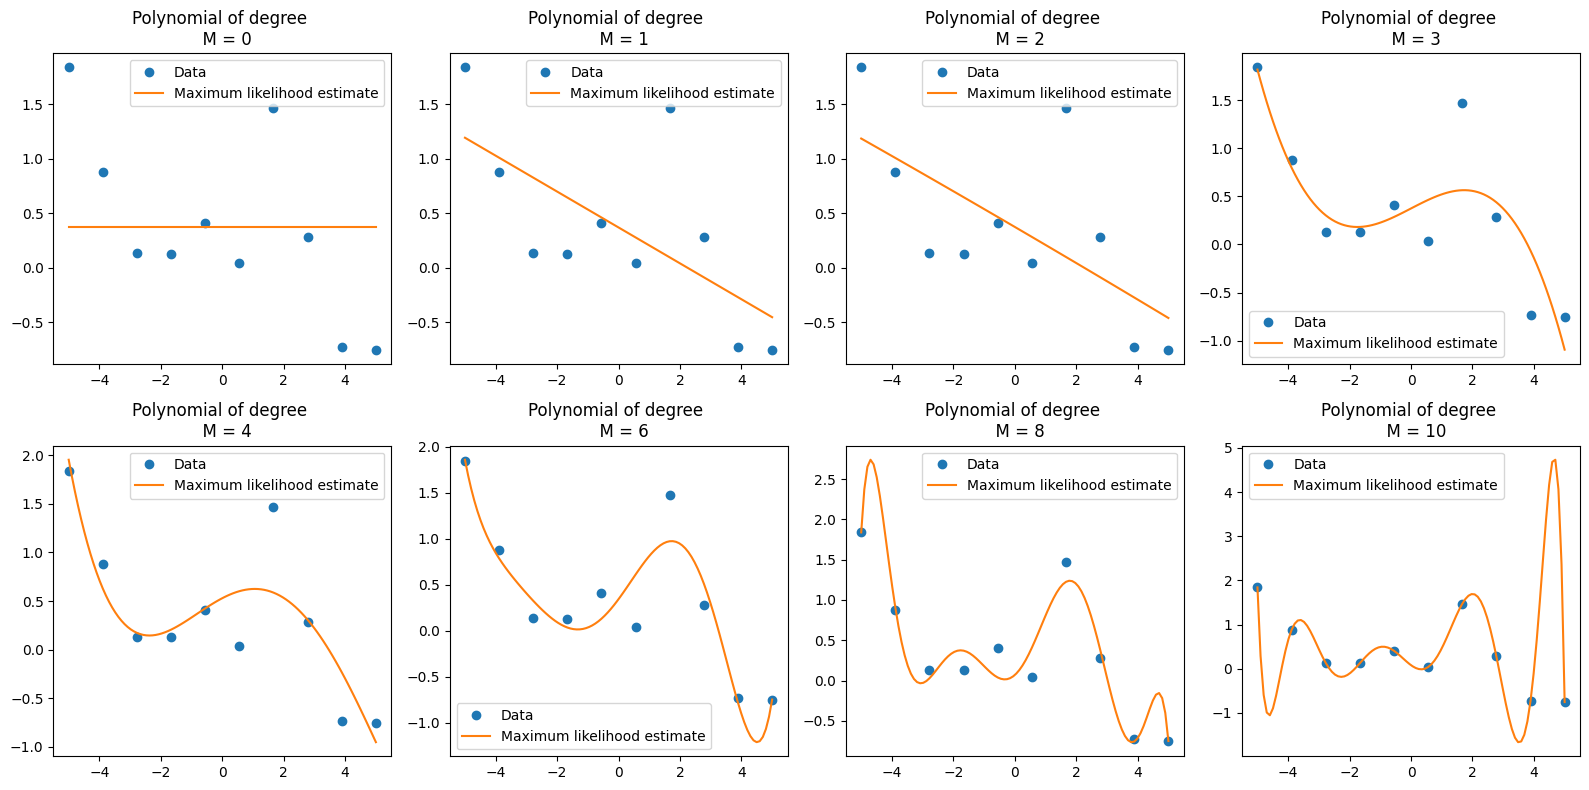

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Generate synthetic data
np.random.seed(0)
x_data = np.linspace(-5, 5, 10)
y_data = np.sin(x_data) + np.random.normal(scale=0.5, size=x_data.shape)

# Polynomial degrees to be plotted
degrees = [0, 1, 2, 3, 4, 6, 8, 10]

# Set up the subplots
fig, axs = plt.subplots(2, 4, figsize=(16, 8))

# Flatten the axes array for easy iteration
axs = axs.flatten()

for i, degree in enumerate(degrees):
    # Fit a polynomial of the current degree
    coefs = np.polyfit(x_data, y_data, degree)
    p = np.poly1d(coefs)

    # Plot the original data
    axs[i].plot(x_data, y_data, 'o', label='Data')

    # Plot the polynomial fit
    x_fit = np.linspace(-5, 5, 100)
    y_fit = p(x_fit)
    axs[i].plot(x_fit, y_fit, label=f'Maximum likelihood estimate')

    # Set the title and legend for the current subplot
    axs[i].set_title(f'Polynomial of degree \n  M = {degree}')
    axs[i].legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


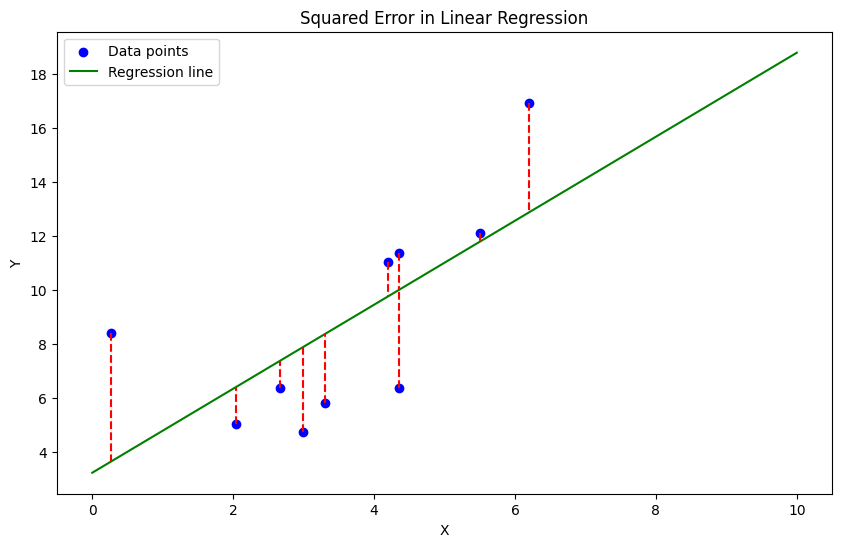

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Generating synthetic data
np.random.seed(2)
x = np.random.rand(10) * 10
y = 2 * x + 1 + np.random.randn(10) * 3

# Fitting a linear regression model
coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
x_line = np.linspace(0, 10, 100)
y_line = polynomial(x_line)

# Calculating squared errors
y_pred = polynomial(x)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='green', label='Regression line')

# Highlighting squared errors
for xi, yi, ypi in zip(x, y, y_pred):
    plt.plot([xi, xi], [yi, ypi], color='red', linestyle='--')
    plt.fill_between([xi, xi], yi, ypi, color='red', alpha=0.1)

plt.title('Squared Error in Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the classical gradient descent algorithm

def gradient_descent(x, y, lr=0.01, epochs=100):
    n = len(y)
    theta0, theta1 = 0, 0  # Initial parameters
    loss_history = []  # To record the loss at each step

    for _ in range(epochs):
        y_pred = theta0 + theta1 * x
        loss = (1/n) * np.sum((y - y_pred)**2)
        loss_history.append(loss)

        dtheta0 = -(2/n) * np.sum(y - y_pred)
        dtheta1 = -(2/n) * np.sum(x * (y - y_pred))

        theta0 = theta0 - lr * dtheta0
        theta1 = theta1 - lr * dtheta1

    return theta0, theta1, loss_history


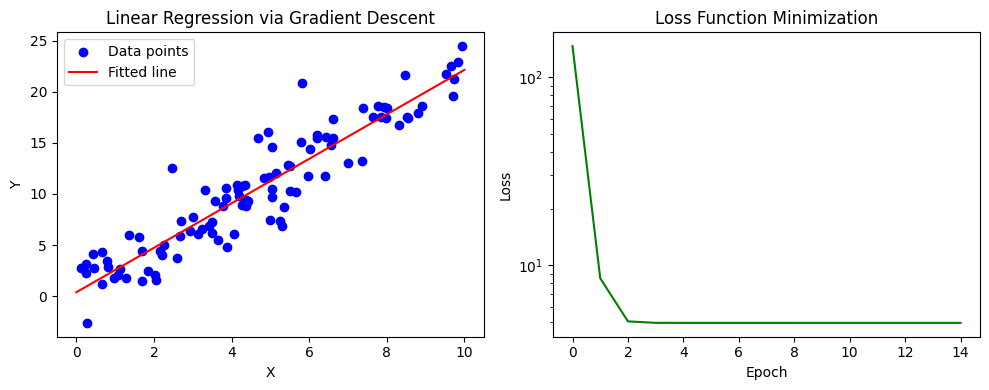

In [ ]:

# Generate synthetic data
np.random.seed(2)
x = np.random.rand(100) * 10
y = 2 * x + 1 + np.random.randn(100) * 2

# Apply gradient descent
theta0, theta1, loss_history = gradient_descent(x, y, lr=0.02, epochs=15)

# Plotting the linear regression result
x_line = np.linspace(0, 10, 100)
y_line = theta0 + theta1 * x_line

plt.figure(figsize=(10, 4))

# Plot 1: Linear Regression Result
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x_line, y_line, color='red', label='Fitted line')
plt.title('Linear Regression via Gradient Descent')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

# Plot 2: Loss Function Over Time
plt.subplot(1, 2, 2)
plt.plot(loss_history, color='green')
plt.title('Loss Function Minimization')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.yscale('log')

plt.tight_layout()
plt.show()


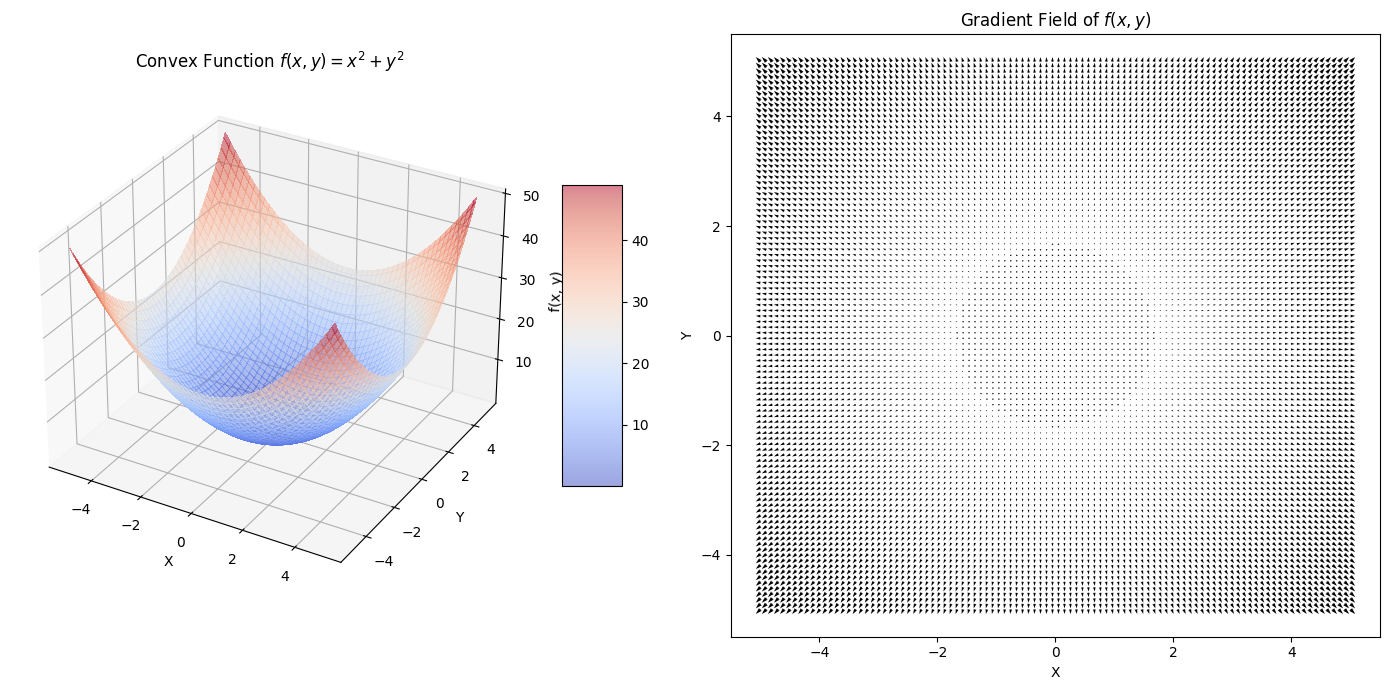

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Define the function and its gradient
def f(x, y):
    return x**2 + y**2  # A simple convex function: f(x, y) = x^2 + y^2

def grad_f(x, y):
    return 2*x, 2*y  # The gradient of f

# Generate grid points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = f(x, y)

# Calculate the gradient at grid points
gx, gy = grad_f(x, y)

# Plotting
fig = plt.figure(figsize=(14, 7))

# Plot the function
ax1 = fig.add_subplot(1, 2, 1, projection='3d')
surf = ax1.plot_surface(x, y, z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=0.5)
fig.colorbar(surf, ax=ax1, shrink=0.5, aspect=5)
ax1.set_title('Convex Function $f(x, y) = x^2 + y^2$')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('f(x, y)')

# Plot the gradient field
ax2 = fig.add_subplot(1, 2, 2)
Q = ax2.quiver(x, y, gx, gy)
ax2.quiverkey(Q, X=0.3, Y=-0.1, U=10, label='Gradient of f', labelpos='E')
ax2.set_title('Gradient Field of $f(x, y)$')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')

plt.tight_layout()
plt.show()
